In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
df=pd.read_csv("ex2data1.txt",header=None)
X=df.iloc[:,:-1].values
# iloc[:,:-1]은 모든 행에 대하여 마지막열 전까지 열데이터만 출력하라는 것이다.
# 그 추출한 열데이터들을 .values로 인해 배열로 X라는 변수에 저장한다.
# X는 [100 x 2] 크기의 배열이 된다.
y=df.iloc[:,-1].values
# iloc[:,-1]은 모든 행에 대하여 마지막열 데이터만 출력하라는 것이다.
# 그 추출한 열데이터을 .values로 인해 배열로 y라는 변수에 저장한다.
# y는 100 크기의 벡터가 된다.

In [35]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [36]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


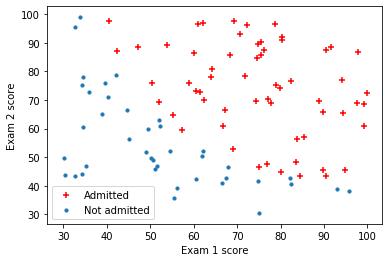

In [37]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
# y안에 들어있는 값들 중에 y==1인 것들을 True, y==0 것들을 False로
# [100 x 1] 크기의 배열에 넣은 뒤 pos라는 변수에 지정한다.
# y안에 들어있는 값들 중에 y==0인 것들을 True, y==1인 것들을 False로
# [100 x 1] 크기의 배열에 넣은 뒤 neg라는 변수에 지정한다.
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
# [100 x 2] 크기의 X 배열과 100 크기의 pos의 벡터와 매치하여 그 중 값이 True이고 0번째 열인 것들을 x축으로 삼고
# [100 x 2] 크기의 X 배열과 100 크기의 pos의 벡터와 매치하여 그 중 값이 True이고 1번째 열인 것들을 x축으로 삼아
# 산점도를 그리는데 색깔은 빨간색, 모양은 +로 한다.
# 즉, y==1인 값들을 + 모양으로 표시한다.
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
# [100 x 2] 크기의 X 배열과 100 크기의 neg의 벡터와 매치하여 그 중 값이 True이고 0번째 열인 것들을 x축으로 삼고
# [100 x 2] 크기의 X 배열과 100 크기의 neg의 벡터와 매치하여 그 중 값이 True이고 1번째 열인 것들을 x축으로 삼아
# 산점도를 그리는데 모양은 o, 크기는 10으로 한다.
# 즉, y==0인 값들을 o 모양으로 표시한다.
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)
# 차례대로 산점도를 그린것을  +는 Adimitted, o는 Not adimitted라는 범례를 만든다.
# 위치는 best(0)

In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# sigmoid 함수를 정의한다. np.exp는 밑이 e인 지수함수로 변환해 준다.

In [39]:
sigmoid(0)

0.5

In [40]:
def costFunction(theta, X, y):
    m=len(y)
    
    predictions = sigmoid(np.dot(X, theta))
#   [100 x 3]과 [3 x 1]를 내적의 결과에 sigmoid 함수를 적용한다.
#   그 결과값이 Logistic Regression에서의 predictions이다.
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
#   Logistic Regression에서의 공식을 따른다.    
    cost = 1/m * sum(error)
#   Logistic Regression에서의 공식을 따른다.    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
#   X를 transpose한 것과 (예측한 값 - 실제 값)과의 내적의 결과를 error에 저장
#   이 결과 gradient descent공식에서 시그마부터 끝까지의 결과가 만들어진다.(그림으로 그려보면 이해하기 쉽다.)
#   np.dot(X.transpose(), (predictions - y))의 결과는 [3 x 1]의 결과가 나온다.    
    return cost[0] , grad
# 9.65424447e-02의 결과는 소수점을 기준으로 왼쪽으로 2번 이동하면 된다.
# 0.09654244469999999356 이러한 값과 같다.

In [41]:
def featureNormalization(X):
    mean=np.mean(X,axis=0)
#   X의 값들 중 열별로 평균을 구해 mean에 저장한다.
#   만약 X가 1차원 배열이라면 배열에 있는 모든 값들의 평균을 구한다.
    std=np.std(X,axis=0)
#   X의 값들 중 열을 따라 계산된 표준 편차를 std에 저장한다.
#   만약 X가 1차원 배열이라면 배열에 있는 모든 값들의 표준 편차를 구한다.
    X_norm = (X - mean)/std
#   (X - mean)/std의 결과를 X_norm에 저장한다.    
    return X_norm , mean , std
#   X_norm, mean, std를 반환한다.

In [42]:
m , n = X.shape[0], X.shape[1]
# X.shape[0]의 결과 100이 m에, X.shape[1]의 결과 2가 n에 저장된다.
X, X_mean, X_std = featureNormalization(X)
# X는 featureNormalization을 한 결과들이 저장되어 있다. scaling이 되어있음.
X= np.append(np.ones((m,1)),X,axis=1)
# 원래의 [100 x 2] 크기의 X라는 행렬 앞에 [100 x 1] 크기의 1들을 붙인다.
# 따라서 X는 [100 x 3] 크기의 행렬이 된다.
y=y.reshape(m,1)
# 100 크기의 벡터였던 y는 [100 x 1] 크기의 행렬로 된다.
initial_theta = np.zeros((n+1,1))
# inital_theta는 [3 x 1]크기의 0들로 가득찬 행렬이 된다.(초기의 theta 값)
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is [0.69314718]
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [43]:
def gradientDescent(X,y,theta,alpha,num_iters): 
    m=len(y)
    J_history =[]
#   Cost Function의 결과들을 J_history에 저장한다.
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
#       costFunction을 적용해 나온 grad에 alpha를 곱하여 기존의 theta값에 빼므로써
#       theta의 값을 업데이트 한다.(gradient descent 공식에 따라)
        J_history.append(cost)
    
    return theta , J_history

In [44]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

In [45]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])
# J_history 마지막에 있는 값을 가져온다. 400번을 반복하고 난후 마지막 cost function의 값이다.

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: [0.20360044]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

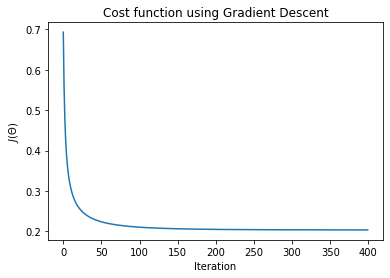

In [46]:
plt.plot(J_history)
# J_history안에 있는 값(cost function의 값들)을 선 형태로 그림을 그린다.
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

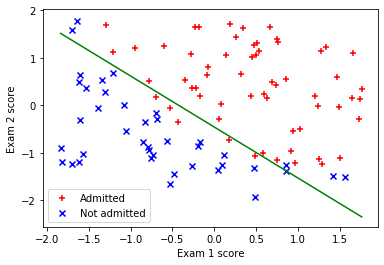

In [47]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [70]:
def classifierPredict(theta,X):
    predictions = X.dot(theta)

    return predictions > 0
#   predictions([100 x 1] 크기의 행렬)중 0이 넘는 값들을 True로 반환한다.
#   나머지는 False로 반환한다.
#   Logistic Regression에서의 hypothesis를 보면 1 / (1 + e^-(theta.transpose * x))이다.
#   이 hypothesis에서는 theta.transpose * x 부분이 0보다 크면 1로 예측한다.
#   따라서 여기서는 sigmoid 함수를 적용하지 않았다.

In [83]:
x_test = np.array([45,85])
# x_test는 45와 85를 가지고 있는 크기 2의 벡터이다.
x_test = (x_test - X_mean)/X_std
# 기존에 계산해 놓았던 X_mean과 X_xtd를 활용해 x_test의 값들을 scaling한다.
x_test = np.append(np.ones(1),x_test)
# x_test앞에 1을 덧붙여 크기 3의 벡터를 만든다.
prob = sigmoid(x_test.dot(theta))
# Rogistic Regression의 hypothesis에 새롭게 만든 데이터인 x_test와 400번 반복하여
# 계산된 theta를 가지고 계산한다. 그 결과 0부터 1사이의 값이 나오게 된다.
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7677628875792492


In [91]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")
# [100 x 1] 크기의 행렬 p와 [100 x 1] 크기의 행렬 y를 비교하여 같은 값 중
# 0번째 열을 다 더하여 출력한다.
# 0 == True -> False, 1 == True -> True
# 0 == False -> True, 0 == True -> False

Train Accuracy: 89 %
